- import lib and check version

In [1]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np
import re
import demoji
import datetime

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

/Users/frostace/.conda/envs/bert_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/frostace/.conda/envs/bert_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/frostace/.conda/envs/bert_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/frostace/.conda/envs/bert_env/lib

Tensor Flow Version: 1.13.1
Keras Version: 2.2.4-tf

Python 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas 1.0.1
Scikit-Learn 0.22.1
GPU is NOT AVAILABLE


- start server service in terminal

In [2]:
# source activate bert_env
# bert-serving-start -model_dir ./model/tmp/english_L-12_H-768_A-12/ -num_worker=1

- start client service

In [3]:
from bert_serving.client import BertClient
bc = BertClient()
# bc.encode(['First do it', 'then do it right', 'then do it better'])

# EDA

- how to tell apart letter alphabet and google alphabet

In [4]:
text_data_df = pd.read_csv('test.csv')
row_num = text_data_df.shape[0]
col_num = text_data_df.shape[1]
simple_ch = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'letter', 'letters']
tweet_matrix = []
for row in range(row_num):
    this_row_sentence = ""
    for col in range(col_num):
#         print(text_data_df.iloc[row, col])
        if str(text_data_df.iloc[row, col]).lower() in simple_ch: break
        if not isinstance(text_data_df.iloc[row, col], str):
            this_row_sentence = " ".join(text_data_df.iloc[row, :col].to_list())
#             print(this_row_sentence)
            tweet_matrix.append(this_row_sentence)
            break
vector_matrix = bc.encode(tweet_matrix)
event_vector_repres_df = pd.DataFrame(vector_matrix) 
event_vector_repres_df.shape

/Users/frostace/.conda/envs/bert_env/lib/python3.6/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=25" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


(694, 768)

- create correlation heatmap
    - feature perspective

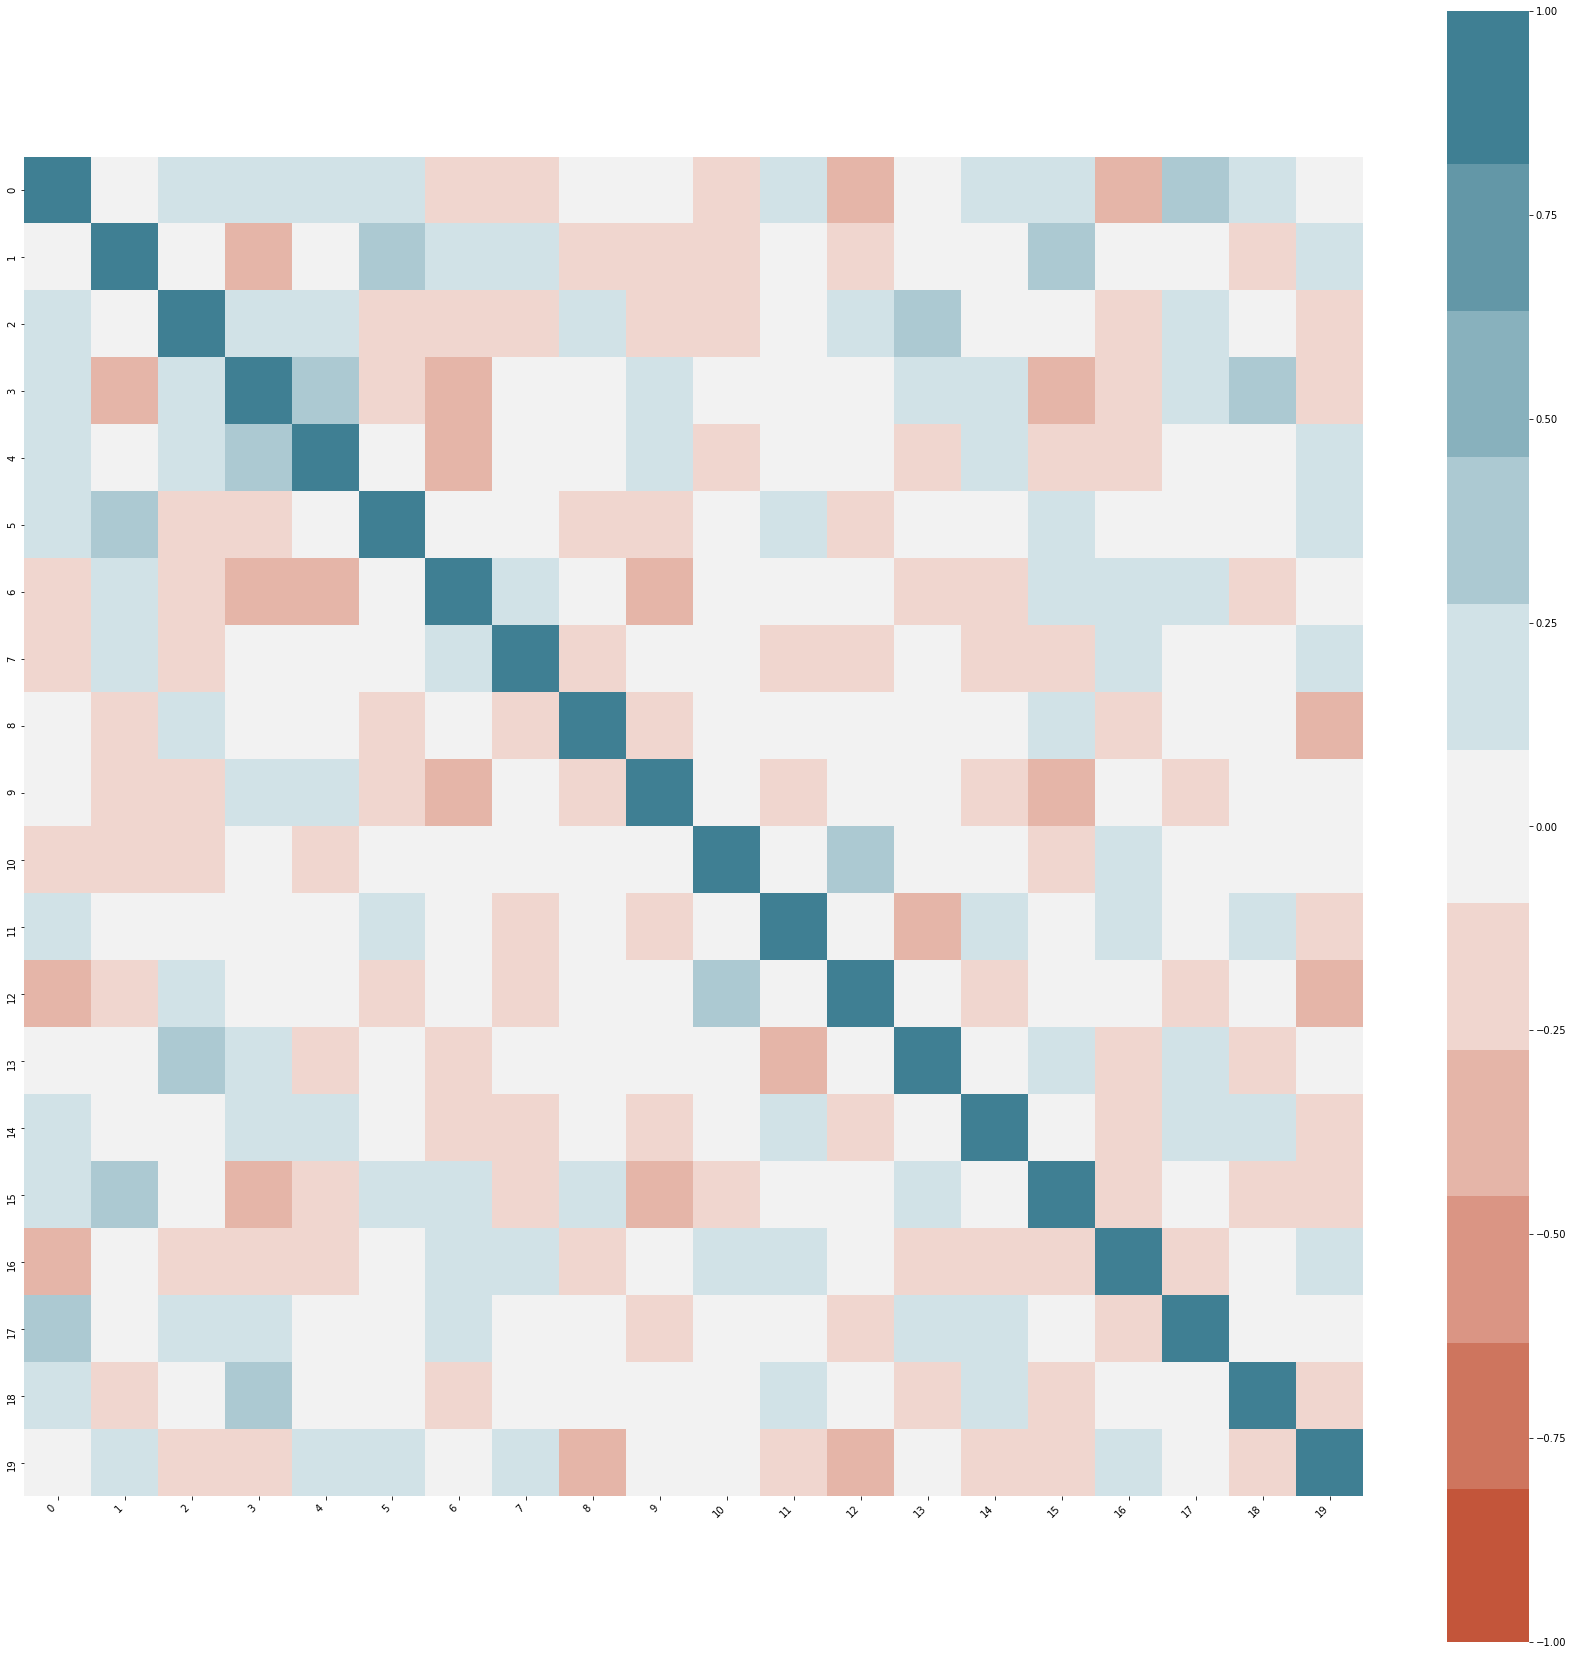

In [5]:
# get first 20 dimensions from the 768-dimensional vector
vector_20 = event_vector_repres_df.iloc[:, :20]
corr = vector_20.corr()
_ = plt.figure(figsize = (30, 30))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=11), # better if the palette color num is odd
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

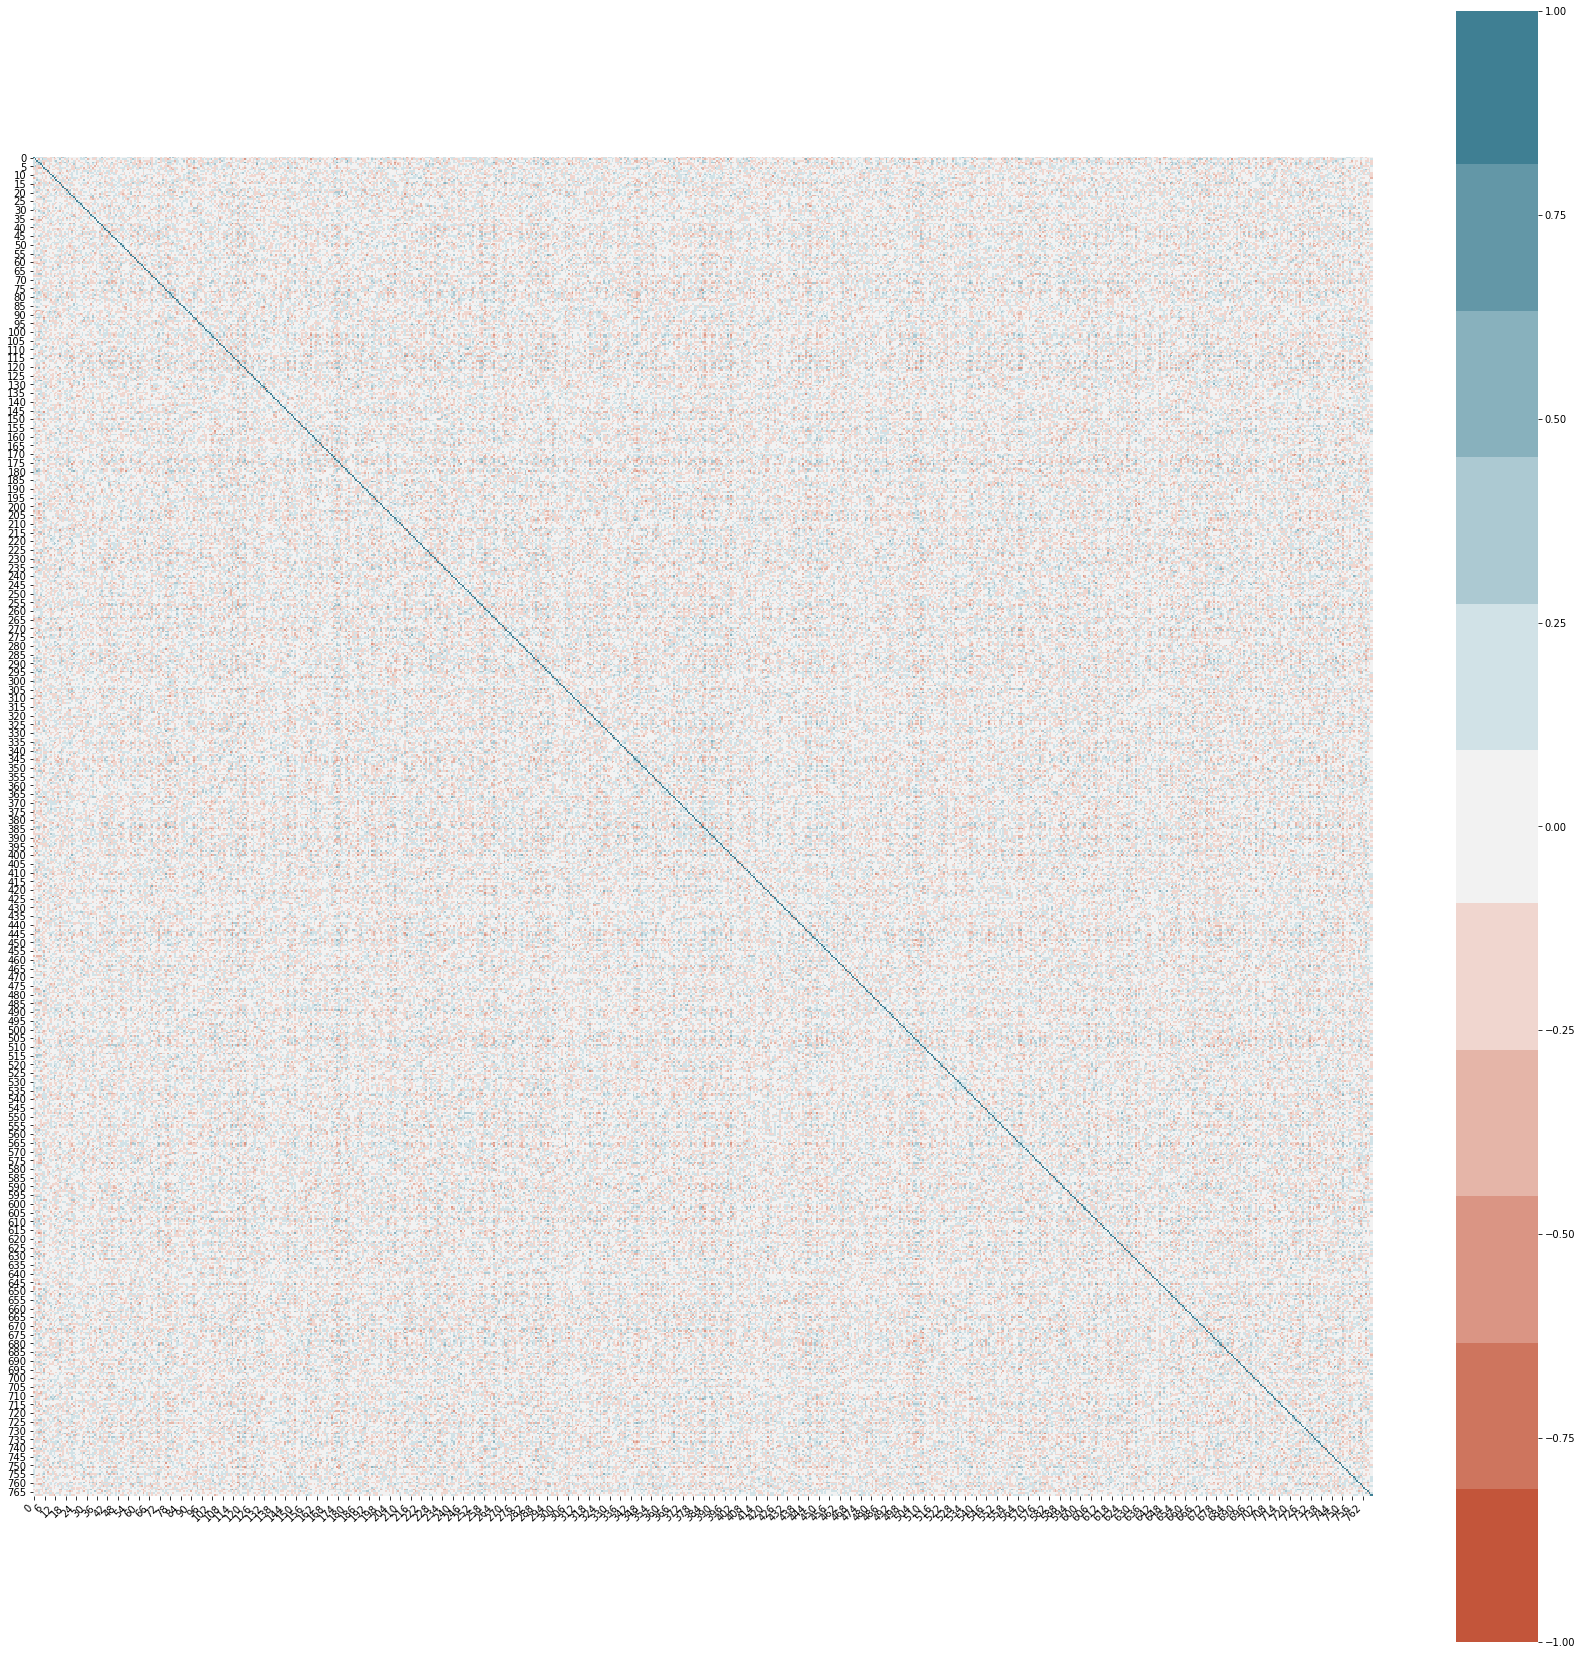

In [6]:
# get first all 768 dimensions from the 768-dimensional vector
vector_768 = event_vector_repres_df.iloc[:, :]
corr = vector_768.corr()
_ = plt.figure(figsize = (30, 30))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=11), # better if the palette color num is odd
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- create heatmap
    - feature perspective

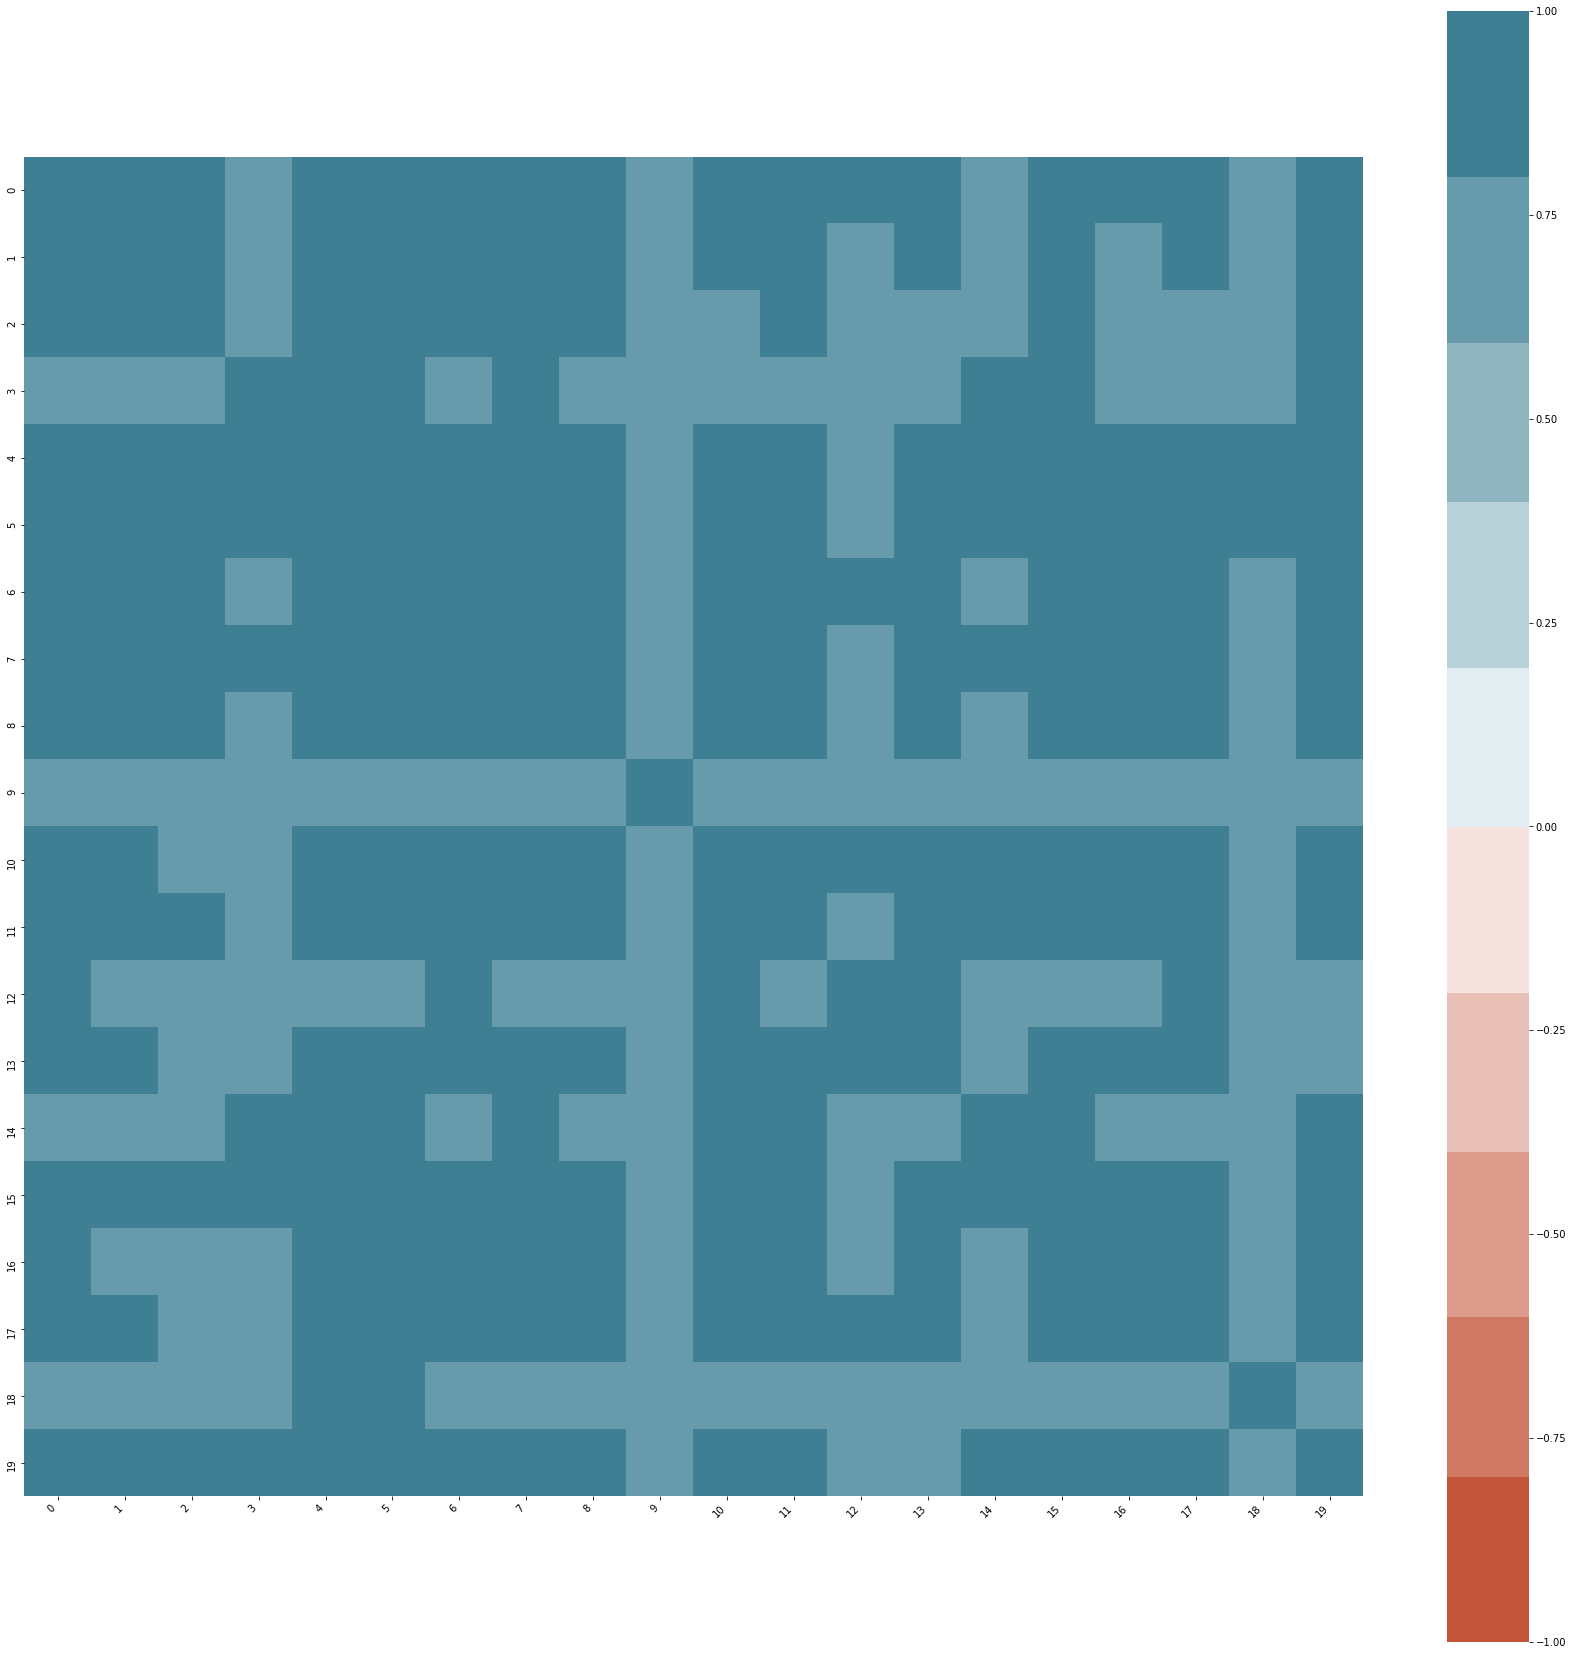

In [7]:
# get first 20 events from all events
event_20 = event_vector_repres_df.iloc[:20, :].transpose()
corr = event_20.corr()
_ = plt.figure(figsize = (30, 30))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=10),
    square=True,
#     ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

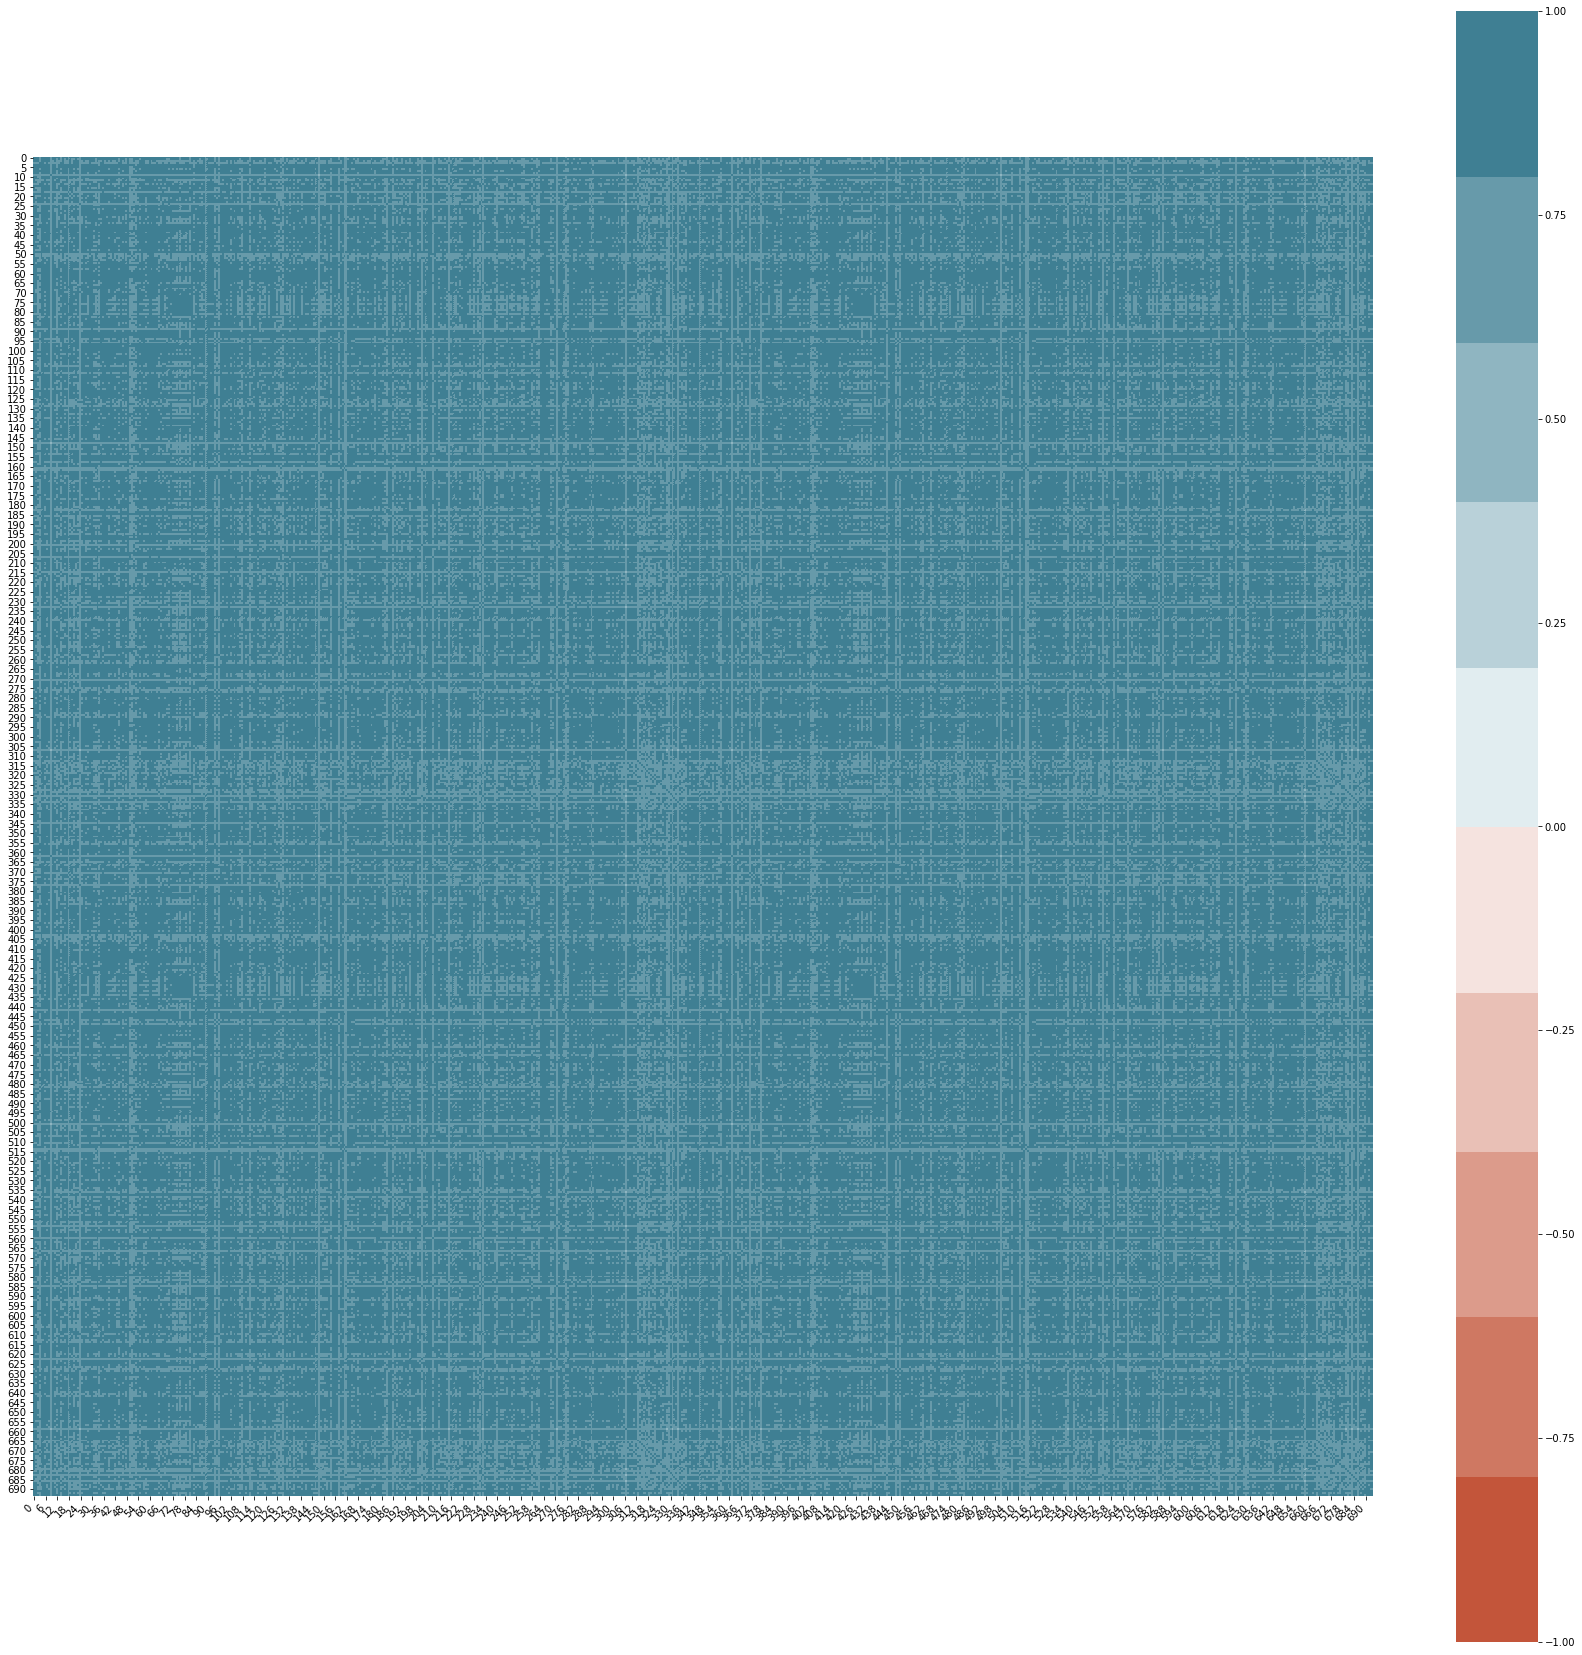

In [8]:
# get all events heatmap
event_all = event_vector_repres_df.iloc[:, :].transpose()
corr = event_all.corr()
_ = plt.figure(figsize = (30, 30))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=10),
    square=True,
#     ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- principle component analysis
    - singular value decomposition

In [9]:
u, s, vh = np.linalg.svd(event_vector_repres_df, full_matrices=True)

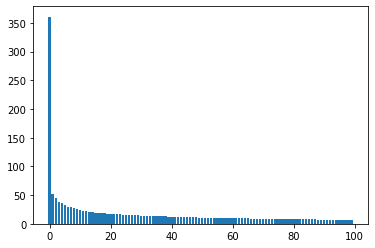

In [10]:
num_of_bars = 100
_ = plt.bar(np.arange(num_of_bars), s[:num_of_bars])

(0, 2)

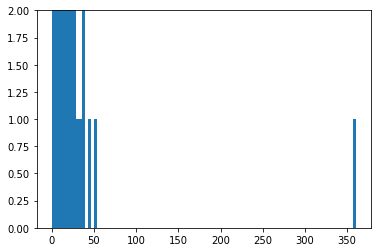

In [11]:
_ = plt.hist(s, bins=100)
plt.ylim((0, 2))

In [12]:
corr = vector_data_df.transpose().corr()
corr

NameError: name 'vector_data_df' is not defined

In [ ]:
vector_data_df.shape